# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who is this data story for? For sports analytics nerds like myself, who find interest in data patterns and data anomalies. There is also an audience who seeks to better understand the lifecycle of a tennis player.\
What does my audience need to know or do? For this story, its good to have a general background of tennis, with knowledge of how long the seasons are and the types of surfaces that are played. Tennis has a long history that dates back more that a couple centuries, however the focus of this story will be over the past 4 decades. I want to illustrate to the audience, the statistics of what it takes to become a professional tennis player, the evolution of styles over the past couple of decades, and general patterns & anomalies in certain players.\
How do I want to display this information to the viewer, how can I use the data to help make my point? Cleaning the data and creating the proper subsets will assist in displaying information to the viewer in the proper way. Using classic bar charts, scatterplots, and line charts get the information across in a concise manner. Specifically looking at the top 3 mens tennis players of all time (Roger Federer, Rafael Nadal, Novak Djokovic), I want to display their dominance and longevity in the sport compared to a couple vary good players (Gael Monfils, Tomas Berdych, Richard Gasquet).

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub


# SQL Database Connection

In [2]:
# Download latest version
path = kagglehub.dataset_download("guillemservera/tennis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\JT von Seggern\.cache\kagglehub\datasets\guillemservera\tennis\versions\41


For peer review, you will need to drop the sqllite database into the folder structure to run the queries. Run the code above to get the file path on your machine. Unfortunatley the database is too large to push to github.

In [30]:
# Import necessary libraries
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Fetch all tables names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Display table names
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
matches
players
rankings


# Matches table

In [4]:
# query on the matches table
query_match = "SELECT * FROM matches where tourney_date > 19980101.0;"

df_match = pd.read_sql_query(query_match, conn)

df_match.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser2_ioc,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points
0,2018-M020,Brisbane,Hard,32,A,20180101.0,271,105992.0,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2018-M020,Brisbane,Hard,32,A,20180101.0,272,111577.0,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2018-M020,Brisbane,Hard,32,A,20180101.0,273,104797.0,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2018-M020,Brisbane,Hard,32,A,20180101.0,275,200282.0,None,WC,...,None,None,None,None,None,None,None,None,None,None
4,2018-M020,Brisbane,Hard,32,A,20180101.0,276,111581.0,None,Q,...,None,None,None,None,None,None,None,None,None,None


# Rankings table

In [5]:
# query on the ranking table
# filtering the match data to get the top 100 ranked players
query_ranking = "SELECT * FROM rankings where ranking_date > 19980101 and rank < 100;"

df_ranking = pd.read_sql_query(query_ranking, conn)

df_ranking.head()

,ranking_date,rank,player,points
0,20000110,1,101736,4135.0
1,20000110,2,102338,2915.0
2,20000110,3,101948,2419.0
3,20000110,4,103017,2184.0
4,20000110,5,102856,2169.0


# Players table

In [6]:
# query the players table
query_players = "SELECT * FROM players;"

df_players = pd.read_sql_query(query_players, conn)

df_players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [31]:
# Close the cursor and connection
cursor.close()
conn.close()

# Summarizing the Datasets

In [8]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664948 entries, 0 to 664947
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tourney_id           664948 non-null  object 
 1   tourney_name         664948 non-null  object 
 2   surface              663195 non-null  object 
 3   draw_size            664948 non-null  object 
 4   tourney_level        664948 non-null  object 
 5   tourney_date         664948 non-null  float64
 6   match_num            664948 non-null  object 
 7   winner_id            664948 non-null  float64
 8   winner_seed          299623 non-null  object 
 9   winner_entry         123957 non-null  object 
 10  winner_name          664948 non-null  object 
 11  winner_hand          664848 non-null  object 
 12  winner_ht            379262 non-null  float64
 13  winner_ioc           664830 non-null  object 
 14  winner_age           662849 non-null  float64
 15  loser_id         

In [9]:
df_match.describe()

,tourney_date,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,minutes,w_ace,w_df,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,6.649480e+05,664948.000000,379262.000000,662849.000000,664948.000000,297713.000000,658462.000000,176993.000000,182361.000000,182361.000000,...,182361.000000,182361.000000,182361.000000,182360.000000,182362.000000,182362.000000,634234.000000,633149.000000,584672.000000,583422.000000
mean,2.011496e+07,117787.040293,184.700843,23.997762,120585.088345,184.659948,23.552829,100.302323,5.678945,2.609884,...,45.290095,29.535114,13.641996,11.375285,4.591395,8.454969,491.241085,303.285446,616.484901,210.964107
std,7.374771e+04,30848.113375,6.551211,3.897129,32861.882401,6.543601,4.110486,39.061500,4.746302,2.224468,...,16.904146,12.714757,6.519451,3.631714,3.103207,3.809469,377.750723,847.126041,466.192465,514.020911
min,1.998010e+07,100236.000000,145.000000,14.000000,100236.000000,145.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.005102e+07,103885.000000,180.000000,21.000000,104026.000000,180.000000,20.400000,73.000000,2.000000,1.000000,...,33.000000,20.000000,9.000000,9.000000,2.000000,6.000000,203.000000,28.000000,233.000000,12.000000
50%,2.012061e+07,105084.000000,185.000000,23.600000,105409.000000,185.000000,23.000000,93.000000,5.000000,2.000000,...,43.000000,28.000000,13.000000,10.000000,4.000000,8.000000,416.000000,84.000000,520.000000,54.000000
75%,2.017102e+07,108761.000000,188.000000,26.400000,120922.000000,188.000000,26.100000,122.000000,8.000000,4.000000,...,55.000000,37.000000,17.000000,14.000000,6.000000,11.000000,680.000000,237.000000,906.000000,200.000000
max,2.024052e+07,212915.000000,211.000000,101.500000,212917.000000,211.000000,101.500000,4756.000000,113.000000,26.000000,...,328.000000,284.000000,101.000000,91.000000,27.000000,38.000000,2257.000000,16950.000000,2267.000000,16950.000000


In [10]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126111 entries, 0 to 126110
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ranking_date  126111 non-null  int64  
 1   rank          126111 non-null  int64  
 2   player        126111 non-null  int64  
 3   points        126111 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 3.8 MB


In [11]:
df_ranking.describe()

,ranking_date,rank,player,points
count,1.261110e+05,126111.000000,126111.000000,126111.000000
mean,2.010197e+07,49.999215,108134.892404,1329.932591
std,7.546542e+04,28.577759,17405.983338,1446.973726
min,1.998010e+07,1.000000,100644.000000,372.000000
25%,2.004022e+07,25.000000,103169.000000,646.000000
50%,2.010033e+07,50.000000,104180.000000,875.000000
75%,2.017011e+07,75.000000,105173.000000,1375.000000
max,2.024053e+07,99.000000,210506.000000,16950.000000


In [12]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65019 entries, 0 to 65018
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    65019 non-null  int64  
 1   name_first   64134 non-null  object 
 2   name_last    64971 non-null  object 
 3   hand         65002 non-null  object 
 4   dob          46447 non-null  float64
 5   ioc          64343 non-null  object 
 6   height       2819 non-null   float64
 7   wikidata_id  4894 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB


In [13]:
df_players.describe()

,player_id,dob,height
count,65019.000000,4.644700e+04,2819.000000
mean,142051.658223,1.981089e+07,183.748138
std,34841.271088,2.007141e+05,6.547397
min,100001.000000,1.834000e+07,145.000000
25%,116270.500000,1.976093e+07,180.000000
50%,132525.000000,1.985061e+07,183.000000
75%,148780.500000,1.993063e+07,188.000000
max,212917.000000,2.008011e+07,211.000000


# Finding Duplicates

In [14]:
# Looking for duplicate values in the tables
match_dupes = df_match.duplicated().sum()
rank_dupes = df_ranking.duplicated().sum()
players_dupes = df_players.duplicated().sum()

print("Duplicate values in the matches table: ", match_dupes)
print("Duplicate values in the rankings table: ", rank_dupes)
print("Duplicate values in the players table: ", players_dupes)

Duplicate values in the matches table:  0
Duplicate values in the rankings table:  0
Duplicate values in the players table:  0


In [15]:
# Checking for duplicate matches in the matches table
df_match["match_id"] = df_match['tourney_id'] + "-" + df_match['match_num'].astype(str)
match_id_dupes = df_match["match_id"].duplicated()

df_match[match_id_dupes]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points,match_id
194651,2021-540,Wimbledon,Grass,128,G,20210628.0,100,104925.0,1.0,None,...,None,None,None,None,None,None,None,None,None,2021-540-100
194652,2021-540,Wimbledon,Grass,128,G,20210628.0,101,104731.0,None,None,...,None,None,None,None,None,None,None,None,None,2021-540-101
194653,2021-540,Wimbledon,Grass,128,G,20210628.0,102,104312.0,None,None,...,None,None,None,None,None,None,None,None,None,2021-540-102
194654,2021-540,Wimbledon,Grass,128,G,20210628.0,103,106045.0,None,Q,...,None,None,None,None,None,None,None,None,None,2021-540-103
194655,2021-540,Wimbledon,Grass,128,G,20210628.0,104,106426.0,17.0,None,...,None,None,None,None,None,None,None,None,None,2021-540-104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663775,2024-580,Australian Open,Hard,128,G,20240115.0,207,106421.0,3,None,...,None,None,None,None,None,None,None,None,None,2024-580-207
663776,2024-580,Australian Open,Hard,128,G,20240115.0,208,100644.0,6,None,...,None,None,None,None,None,None,None,None,None,2024-580-208
663777,2024-580,Australian Open,Hard,128,G,20240115.0,209,111815.0,19,None,...,None,None,None,None,None,None,None,None,None,2024-580-209
663778,2024-580,Australian Open,Hard,128,G,20240115.0,210,200175.0,None,None,...,None,None,None,None,None,None,None,None,None,2024-580-210


There are duplicates in the df_match table on match_id. This is supposed to be a unique element for each match, however sopme of the records have not been entered in correctly (i.e. both players in the match have been listed as winners in separate records, in the same instance the wrong player was listed who did not participate in the match). Duplicate values are allowed for columns that denote a players dominant hand (only 1 of two options) or the players seed in the tournament. 

# Mean, Median, and Mode

In [16]:
# What are the mean, median, and mode of the match columns
df_match_mean = df_match.mean(numeric_only=True).to_frame().T
df_match_median = df_match.median(numeric_only=True).to_frame().T
df_match_mode = df_match.mode(numeric_only=True)

match_stats = pd.concat([df_match_mean, df_match_median, df_match_mode])
match_stats.index = ['mean', 'median', 'mode']
match_stats

,tourney_date,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,minutes,w_ace,w_df,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
mean,2.011496e+07,117787.040293,184.700843,23.997762,120585.088345,184.659948,23.552829,100.302323,5.678945,2.609884,...,45.290095,29.535114,13.641996,11.375285,4.591395,8.454969,491.241085,303.285446,616.484901,210.964107
median,2.012061e+07,105084.000000,185.000000,23.600000,105409.000000,185.000000,23.000000,93.000000,5.000000,2.000000,...,43.000000,28.000000,13.000000,10.000000,4.000000,8.000000,416.000000,84.000000,520.000000,54.000000
mode,2.017062e+07,103819.000000,183.000000,22.200000,103893.000000,183.000000,21.100000,77.000000,3.000000,1.000000,...,36.000000,24.000000,11.000000,9.000000,3.000000,7.000000,1.000000,1.000000,113.000000,1.000000


# Null Values

In [17]:
# Null Values in the match table
df_match.describe(include='all')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points,match_id
count,664948,664948,663195,664948,664948,6.649480e+05,664948,664948.000000,299623,123957,...,0,0,0,0,0,0,0,0,0,664948
unique,20938,5377,4,20,9,NaN,900,NaN,69,23,...,0,0,0,0,0,0,0,0,0,662932
top,2010-560,M15 Monastir,Clay,32,S,NaN,1,NaN,1.0,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-560-186
freq,239,6477,320041,575303,353614,NaN,17213,NaN,43823,74171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,2.011496e+07,NaN,117787.040293,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.374771e+04,NaN,30848.113375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.998010e+07,NaN,100236.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.005102e+07,NaN,103885.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.012061e+07,NaN,105084.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.017102e+07,NaN,108761.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the describe method on the df_match table give you a good look at how many columns have null values. The columns at the end of the table are all null and don't have any data filled out, while the ones near the beginning of the table have the majority of their data filled out but still have nulls. You could fill in some values with the mean, however, there are many columns where a mean doesn't exist. It makes more sense to remove rows without needed information. Selecting a subset of players may further clean this data.

# Inconsistent Data

In [18]:
# Identify inconsistent data in the match table
# Incorrect player being reference in the match table
df_match[df_match['match_id'] == '2021-540-100']


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points,match_id
90569,2021-540,Wimbledon,Grass,128,G,20210628.0,100,111794.0,1.0,None,...,None,None,None,None,None,None,None,None,None,2021-540-100
194651,2021-540,Wimbledon,Grass,128,G,20210628.0,100,104925.0,1.0,None,...,None,None,None,None,None,None,None,None,None,2021-540-100


Novak Djokovic was the winner of this match during the 2021 Wimbledon tournament. However there is a record of another player also winning this match. What's more interesting is that the other player referenced was not the one who played against Novak, it was Jack Draper who has a different Player_id.

# One Hot Encoding

In [19]:
# Using the players table to One-hot encode the hand column
df_players_encoded = pd.get_dummies(df_players, columns=['hand'], prefix='hand')
df_players_encoded.head()

,player_id,name_first,name_last,dob,ioc,height,wikidata_id,hand_A,hand_L,hand_R,hand_U
0,100001,Gardnar,Mulloy,19131122.0,USA,185.0,Q54544,False,False,True,False
1,100002,Pancho,Segura,19210620.0,ECU,168.0,Q54581,False,False,True,False
2,100003,Frank,Sedgman,19271002.0,AUS,180.0,Q962049,False,False,True,False
3,100004,Giuseppe,Merlo,19271011.0,ITA,NaN,Q1258752,False,False,True,False
4,100005,Richard,Gonzalez,19280509.0,USA,188.0,Q53554,False,False,True,False


<Axes: >

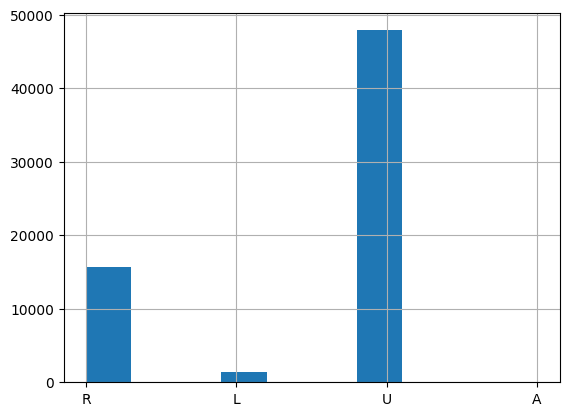

In [20]:
# Plotting histogram of the hand column
df_players['hand'].hist()

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# Conclusion

There are usable data in these tables, however it will be tough to find a good subset. Much of the data is null and there is no telling how much of the data is incorrect. Some spot checking would have to be done for specific matches. Modifying the data would be essential in order to get this data to a reasonable format, there are many inconsistencies that need to be accounted for, some that I have yet to research. The first piece of evidence in terms of class imbalance exists in the winner_entry column on the matches table, this column would need to be cleaned to make it more readable.

In [21]:
df_match['winner_entry'].value_counts()

winner_entry
Q        74171
WC       33942
LL        5890
SE        4192
PR        2569
Alt       1749
JE         378
ITF        307
ALT        237
JR         179
IR         169
A           38
S           36
AL          30
JR          28
P           24
3)           5
6) A         5
1)           2
5) A         2
6)           2
I            1
2) A         1
Name: count, dtype: int64

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [26]:
# Filter the players table
df_players_filtered = df_players[['player_id', 'name_first', 'name_last', 'hand']]
df_players_filtered['full_name'] = df_players_filtered['name_first'] + " " + df_players_filtered['name_last']
df_people = df_players_filtered[(df_players_filtered['full_name'].isin(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Gael Monfils', 'Tomas Berdych', 'Richard Gasquet']))]

# Filter the rankings table
df_ranking_filtered = df_ranking[['player', 'rank', 'ranking_date']]

# Merge the fitlered players and rankings table
df_players_ranking = pd.merge(df_people, df_ranking_filtered, left_on='player_id', right_on='player', how='inner', sort=True)

df_players_ranking.head()


C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_10204\834777902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_filtered['full_name'] = df_players_filtered['name_first'] + " " + df_players_filtered['name_last']


,player_id,name_first,name_last,hand,full_name,player,rank,ranking_date
0,103819,Roger,Federer,R,Roger Federer,103819,61,20000110
1,103819,Roger,Federer,R,Roger Federer,103819,62,20000117
2,103819,Roger,Federer,R,Roger Federer,103819,62,20000124
3,103819,Roger,Federer,R,Roger Federer,103819,61,20000131
4,103819,Roger,Federer,R,Roger Federer,103819,67,20000207


In [27]:
# grab the yearend rank of the player
df_players_ranking['year'] = df_players_ranking['ranking_date'].astype(str).str[:4]
df_players_ranking['year'] = df_players_ranking['year'].astype(int)
df_players_ranking['yearend_date'] = df_players_ranking.groupby(['player', 'year'])['ranking_date'].transform('max')
df_players_ranking = df_players_ranking[df_players_ranking['ranking_date'] == df_players_ranking['yearend_date']]
df_players_ranking = df_players_ranking.drop_duplicates(subset=['player', 'year']).sort_values(by=['year'])

df_players_ranking

,player_id,name_first,name_last,hand,full_name,player,rank,ranking_date,year,yearend_date
629,103819,Roger,Federer,R,Roger Federer,103819,64,19991227,1999,19991227
50,103819,Roger,Federer,R,Roger Federer,103819,29,20001225,2000,20001225
103,103819,Roger,Federer,R,Roger Federer,103819,13,20011231,2001,20011231
155,103819,Roger,Federer,R,Roger Federer,103819,6,20021230,2002,20021230
207,103819,Roger,Federer,R,Roger Federer,103819,2,20031229,2003,20031229
...,...,...,...,...,...,...,...,...,...,...
3238,104755,Richard,Gasquet,R,Richard Gasquet,104755,76,20231225,2023,20231225
4086,104792,Gael,Monfils,R,Gael Monfils,104792,74,20231225,2023,20231225
3710,104755,Richard,Gasquet,R,Richard Gasquet,104755,76,20240108,2024,20240108
4560,104792,Gael,Monfils,R,Gael Monfils,104792,37,20240527,2024,20240527


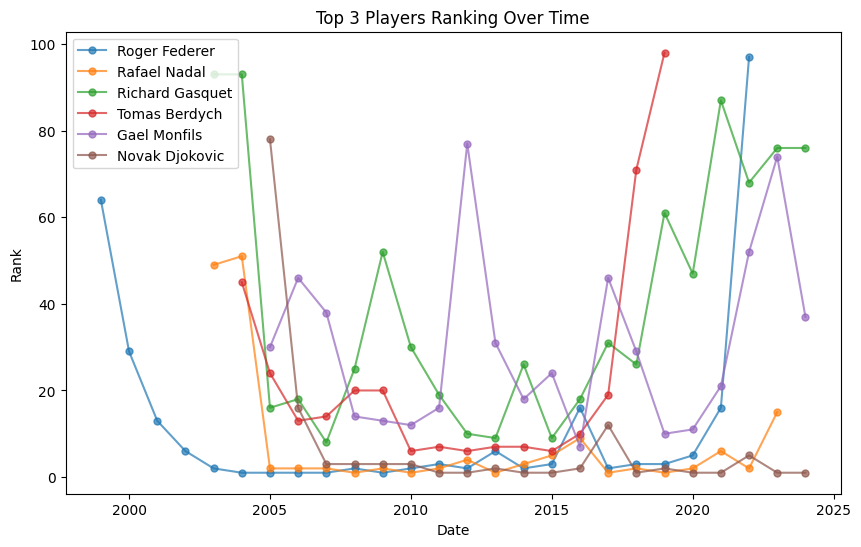

In [28]:
# plot a line chart of the players rankings over time
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for player in df_players_ranking['full_name'].unique():
    player_data = df_players_ranking[df_players_ranking['full_name'] == player]
    ax.plot(player_data['year'], player_data['rank'], label=player, marker='o', linestyle='-', markersize=5, alpha=0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Rank')
ax.set_title('Top 3 Players Ranking Over Time')
ax.legend()
plt.show()